In [1]:
import os
import torch

In [2]:
base_dir = "/scratch/connectome/dyhan316/VAE_ADHD/barlowtwins"

In [3]:
##checking inputs
# 이미 epoch이 70을 넘었으니 괜찮을 것 같기는한데 모르겠다 


##checking the weight values

##checking the mm Things

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import monai
import nibabel as nib


In [5]:
def plot_brain(npy_brain):
    npy_brain = npy_brain.squeeze()
    brain_shape = npy_brain.shape
    print(f'input_shape : {brain_shape}')
    
    if len(brain_shape) ==3: #if just one image
        npy_brain = npy_brain.reshape(1,*brain_shape)
        brain_shape = npy_brain.shape
    #import pdb; pdb.set_trace()
    fig, ax = plt.subplots(3,brain_shape[0], figsize= (3*brain_shape[0], 8))
    for i,one_brain in enumerate(npy_brain):
        if brain_shape[0] != 1 : 
            ax[0,i].imshow(npy_brain[i,int(brain_shape[1]/2)])
            ax[1,i].imshow(npy_brain[i,:,int(brain_shape[2]/2)])
            ax[2,i].imshow(npy_brain[i,:,:,int(brain_shape[3]/2)])
        else : 
            ax[0].imshow(npy_brain[i,int(brain_shape[1]/2)])
            ax[1].imshow(npy_brain[i,:,int(brain_shape[2]/2)])
            #ax[2].imshow(npy_brain[i,:,:,int(90)])
            ax[2].imshow(npy_brain[i,:,:,int(brain_shape[3]/2)])
    #plt.show()
#plot_brain(np.arange(2*3*4).reshape(1,2,3,4))
#plot_brain(np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/modified.npy"))


In [6]:
####loading various images
##ADNI, without flip
ADNI_no_flip_train = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/not_flip_ADNI_train_loader.npy",
                            allow_pickle = True)
ADNI_no_flip_val = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/not_flip_ADNI_val_loader.npy",
                          allow_pickle= True)
ADNI_no_flip_test = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/not_flip_ADNI_test_loader.npy",
                           allow_pickle= True)

##original ADNI, with flip
ADNI_junbeom_train = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/original_ADNI_train_loader.npy",
                            allow_pickle = True)
ADNI_junbeom_val = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/original_ADNI_val_loader.npy",
                          allow_pickle= True)
ADNI_junbeom_test = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/original_ADNI_test_loader.npy",
                           allow_pickle= True)

#ADNI_junbeom = np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/test_img.npy")
UKB_raw = nib.load("/scratch/connectome/3DCNN/data/2.UKB/1.sMRI_fs_cropped/1000246.crop.nii.gz").get_fdata()

##ABCD_batch
ABCD_train = np.load('/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/ABCD_train_loader.npy',
        allow_pickle= True)
ABCD_val = np.load('/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/ABCD_val_loader.npy',
        allow_pickle= True)
ABCD_test = np.load('/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/ABCD_val_loader.npy',
        allow_pickle= True)





input_shape : (8, 80, 80, 80)
input_shape : (2, 80, 80, 80)
input_shape : (80, 80, 80)


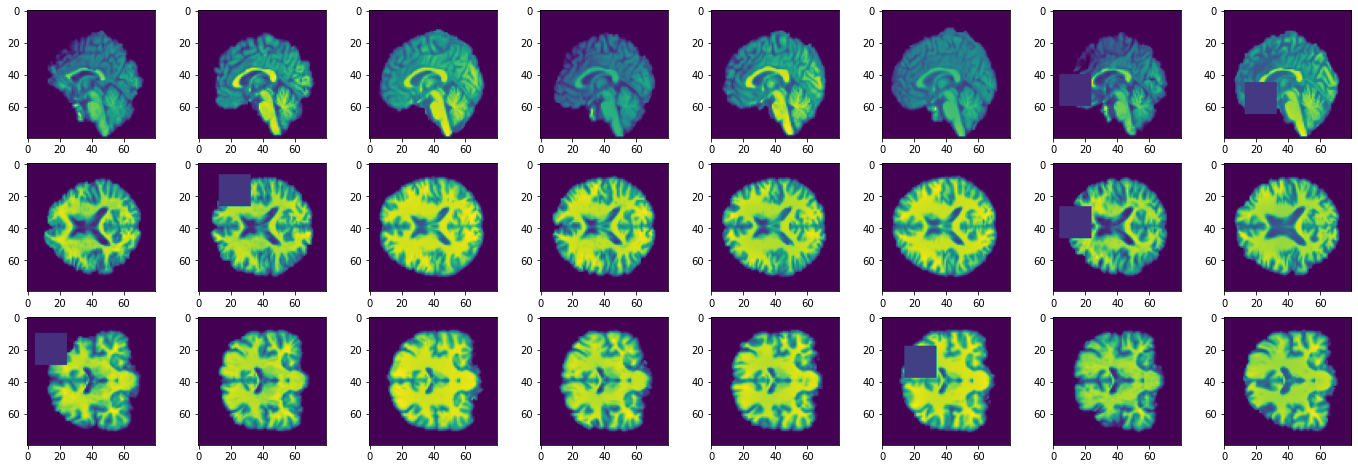

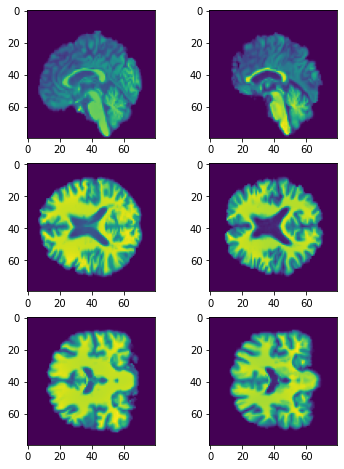

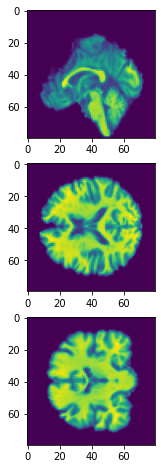

In [7]:
##original things
plot_brain(ADNI_junbeom_train)
plot_brain(ADNI_junbeom_val)
plot_brain(ADNI_junbeom_test)


input_shape : (8, 80, 80, 80)
input_shape : (2, 80, 80, 80)
input_shape : (8, 80, 80, 80)


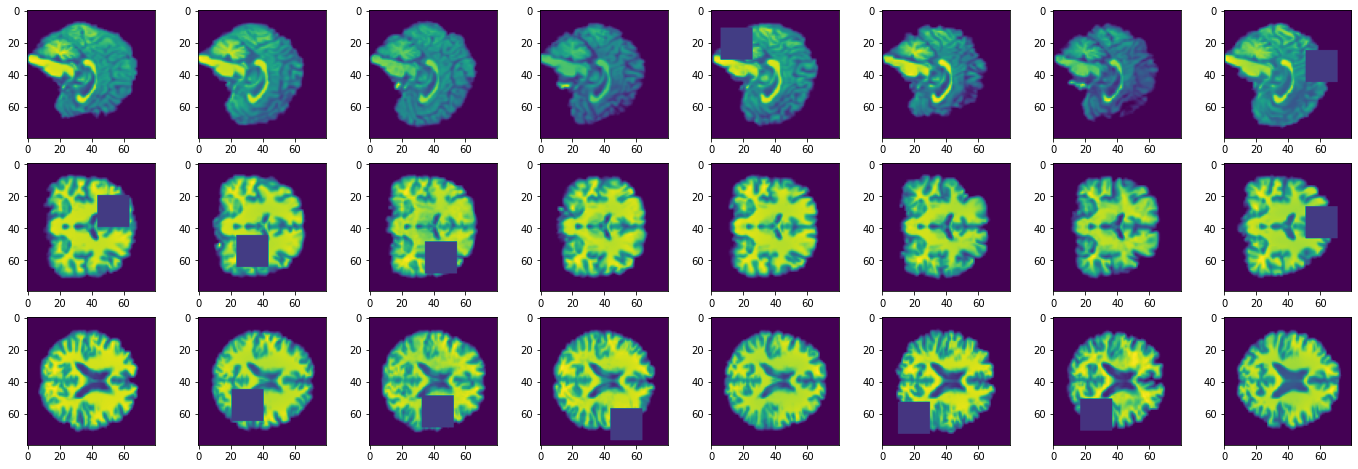

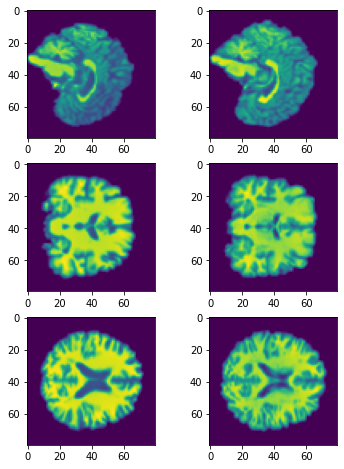

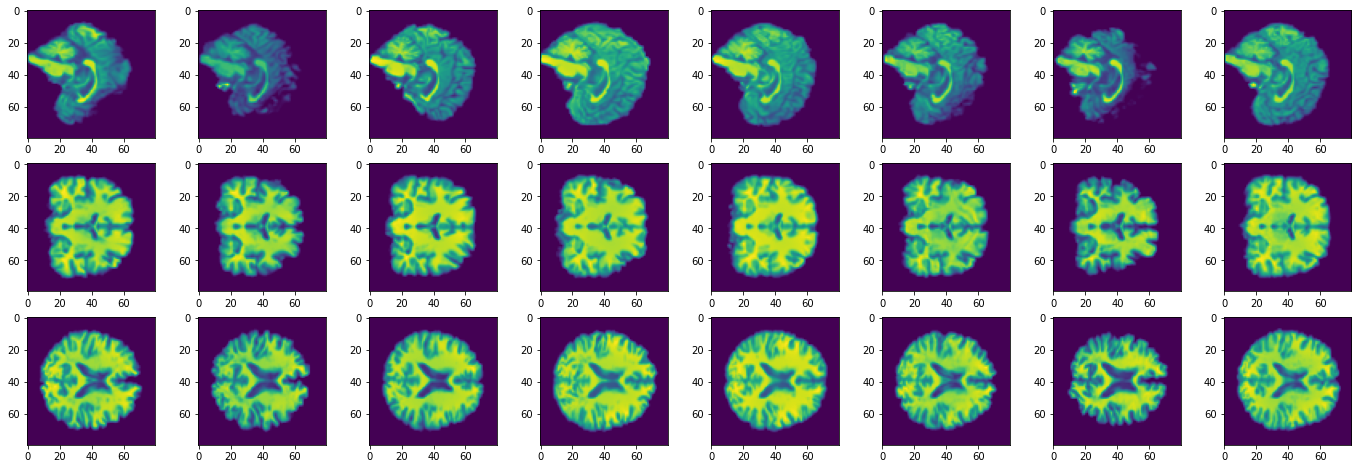

In [8]:
##new things 
plot_brain(ADNI_no_flip_train)
plot_brain(ADNI_no_flip_val)
plot_brain(ADNI_no_flip_test)


input_shape : (99, 117, 95)
input_shape : (2, 99, 117, 95)
input_shape : (2, 99, 117, 95)
input_shape : (2, 99, 117, 95)
(1, 99, 117, 95)


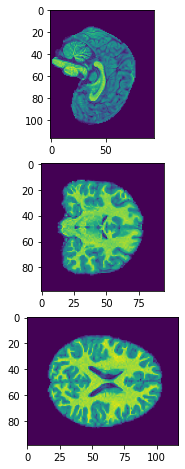

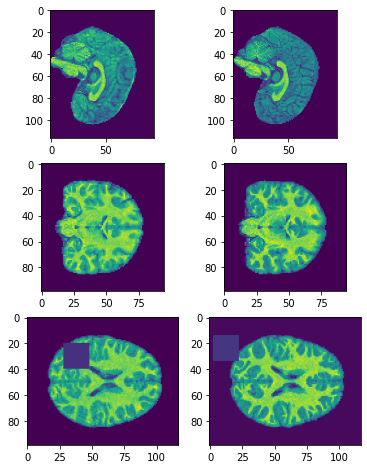

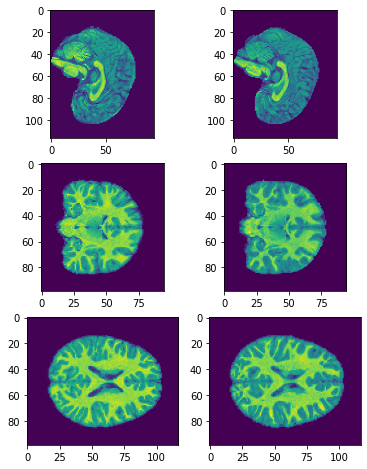

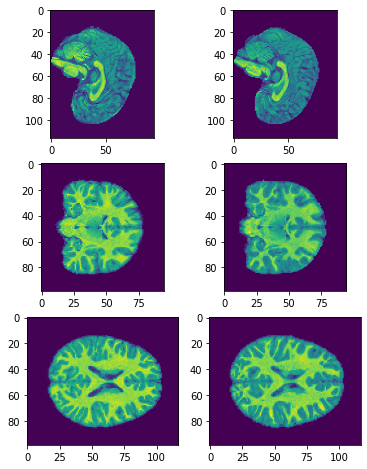

In [11]:
### ABCD_raw
ABCD_raw = np.load('/scratch/connectome/3DCNN/data/1.ABCD/1.sMRI_fmriprep/preprocessed_masked/NDARINVXPZGM0LG.npy')

plot_brain(ABCD_raw)
### ABCD_batch
plot_brain(ABCD_train)
plot_brain(ABCD_val)
plot_brain(ABCD_test)
print(ABCD_train[0].shape)

input_shape : (150, 184, 122)


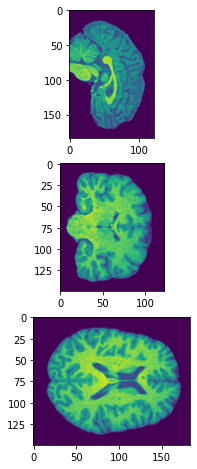

In [10]:
#### UKB_raw
plot_brain(UKB_raw[:,:,25:])

## 결론 : 
1. 모든 dataaset의 orientatino은 동일하다
2. 오히려, 준범쌤 코드에서 orientation을 바꾸는 것이 이상하다 (swap axes and stuff)
3. since junbeom pretraining은 flip random axis였으니, 솔직히 그냥 flip axes안하고 해도 될듯??

#### BELOW : TRAWSH

In [21]:
UKB_raw[:,:,30:].shape

(150, 184, 117)

ADNI_no_flip
input_shape : (8, 80, 80, 80)
UKB_raw
input_shape : (150, 184, 147)
ADNI_junbeom
input_shape : (80, 80, 80)
HAHA
input_shape : (8, 80, 80, 80)


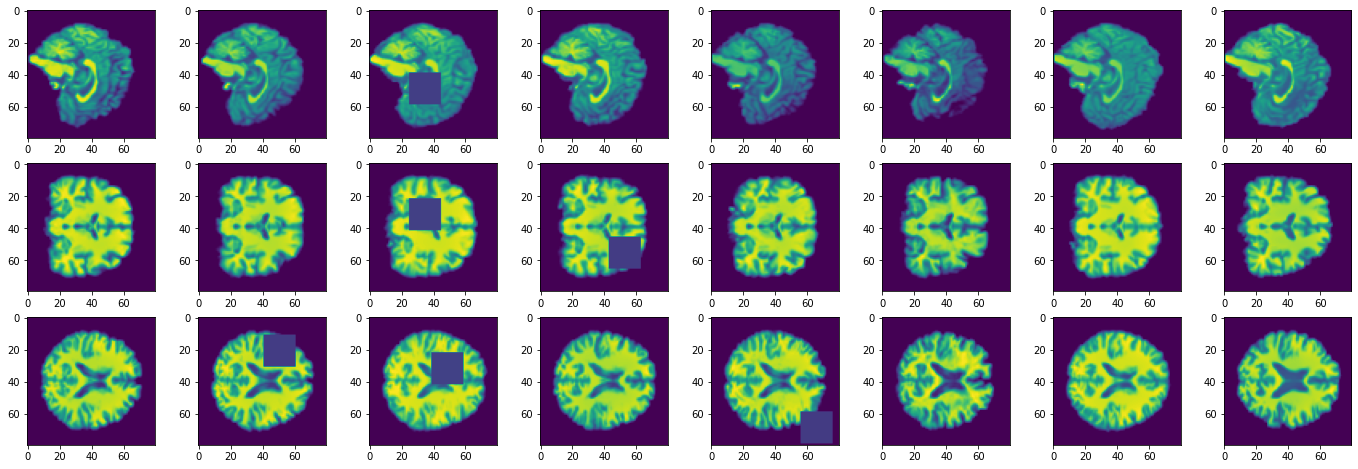

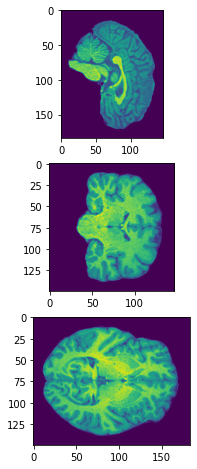

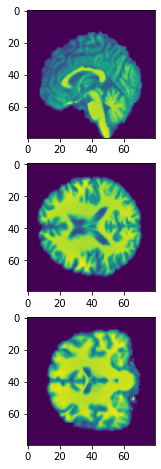

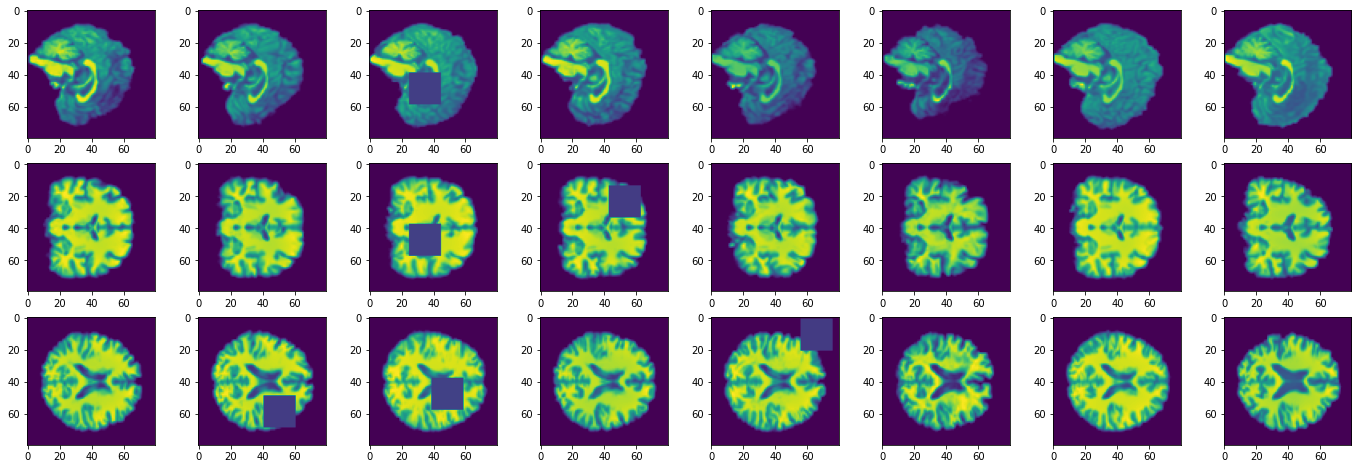

In [7]:
print("ADNI_no_flip")
plot_brain(ADNI_no_flip)
print("UKB_raw")
plot_brain(UKB_raw)
print("ADNI_junbeom")
plot_brain(ADNI_junbeom)
print("HAHA")

plot_brain(np.flip(np.flip(np.swapaxes(ADNI_no_flip, 1,2),1),2))

In [8]:
plt.imshow(a[0,40])
plt.colorbar()

NameError: name 'a' is not defined

In [ ]:
plt.imshow(UKB[74])
plt.colorbar()

#### check if augmentation was done successfully

[0.0023210745, -0.023117416, -0.028665883, -0.022227915, 0.0058702235, -0.018390251, -0.0005280314, -0.008597921] 
 [0.99486274, 0.9744429, 0.97061694, 0.97618294, 0.9961563, 0.9764994, 0.9924609, 0.98779863]


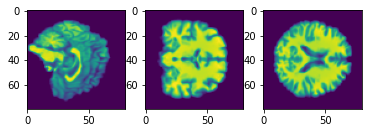

In [30]:
##functionalize below, and run it!!
#compare between different things
new= np.load("/scratch/connectome/dyhan316/VAE_ADHD/junbeom_finetuning/trash/modified.npy")
#plt.imshow(new[0,0,40])
fig, ax = plt.subplots(1,3)
ax[0].imshow(new[0,0,40])
ax[1].imshow(new[0,0,:,40])
ax[2].imshow(new[0,0,:,:,40])
#ax[0].colorbar()

#indeed, the values are normalized 
print([np.average(i) for i in new], '\n' ,[np.std(i) for i in new])

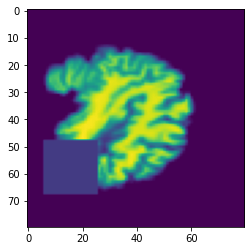

In [9]:
plt.imshow(np.flip(new[0],1)[0,20]) 
#guess this is like reversed image, since it's cropped out 
#also, 

In [10]:
a = np.arange(2*3*4).reshape(2,3,4)
print(a)
print(np.flip(a,1))

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
[[[ 8  9 10 11]
  [ 4  5  6  7]
  [ 0  1  2  3]]

 [[20 21 22 23]
  [16 17 18 19]
  [12 13 14 15]]]


## dksjfskdlfj